In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from lls import LinearLeastSquare

Download House Price (Tehran, Iran) dataset from [Kaggle](https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran) or [GitHub](https://github.com/mokar2001/House-Price-Tehran-Iran)

In [20]:
# Load data
data = pd.read_csv("HousePrice.csv")
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3469,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3470,75,2,False,False,False,Parand,3.650000e+08,12166.67
3471,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [21]:
data.drop_duplicates(inplace=True)
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3467,63,1,True,True,False,Feiz Garden,1.890000e+09,63000.00
3468,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3469,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3471,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3265 non-null   int64  
 1   Room        3265 non-null   int64  
 2   Parking     3265 non-null   bool   
 3   Warehouse   3265 non-null   bool   
 4   Elevator    3265 non-null   bool   
 5   Address     3242 non-null   object 
 6   Price       3265 non-null   float64
 7   Price(USD)  3265 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 162.6+ KB


In [24]:
data.describe()

,Area,Room,Price,Price(USD)
count,3265.000000,3265.000000,3.265000e+03,3.265000e+03
mean,107.543645,2.086371,5.450657e+09,1.816886e+05
std,70.734379,0.763691,8.249013e+09,2.749671e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,70.000000,2.000000,1.417500e+09,4.725000e+04
50%,90.000000,2.000000,2.950000e+09,9.833333e+04
75%,121.000000,2.000000,6.100000e+09,2.033333e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [25]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [26]:
# Preprocess data
data.drop("Address", axis=1, inplace=True)
data.replace([True, False], [1, 0], inplace=True)
data.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
843,51,2,0,1,1,1.050000e+09,35000.00
748,78,2,0,1,0,5.800000e+08,19333.33
2776,60,1,0,1,0,8.300000e+08,27666.67
1824,245,3,1,1,1,1.900000e+10,633333.33
1904,150,3,1,1,1,7.200000e+09,240000.00


In [8]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


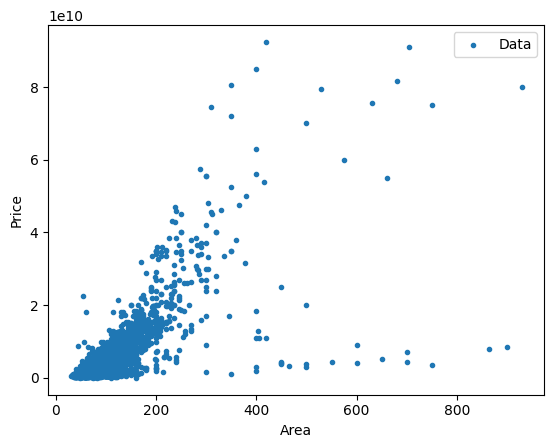

In [6]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(["Data"])
plt.show()

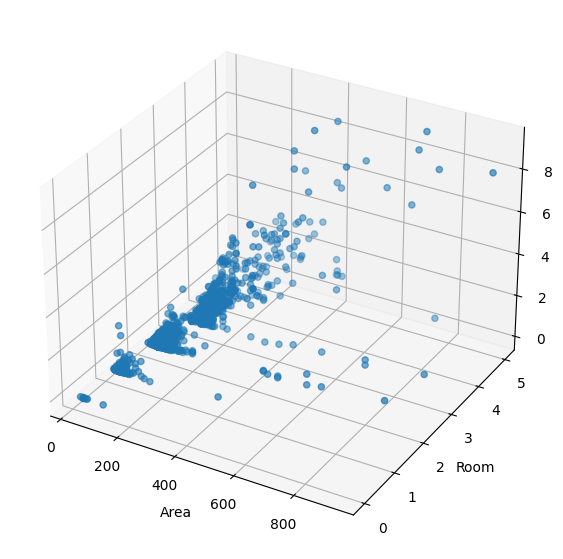

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['Area'], data['Room'], data['Price'])
ax.set_xlabel('Area')
ax.set_ylabel('Room')
ax.set_zlabel('Price')
plt.show()

In [8]:
X = np.array(data[["Area", "Room"]])
Y = np.array(data[["Price"]])

print(X.shape)
print(Y.shape)

(3473, 2)
(3473, 1)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2604, 2)
(2604, 1)
(869, 2)
(869, 1)


In [10]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)

In [11]:
Y_pred = lls.predict(X_test)

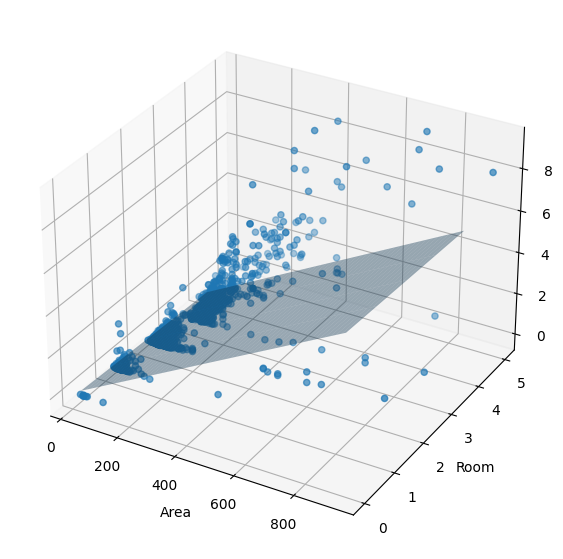

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_arange = np.arange(X_train[:,0].min(), X_train[:,0].max())
y_arange = np.arange(X_train[:,1].min(), X_train[:,1].max())
px, py = np.meshgrid(x_arange, y_arange)
 
pz = px * lls.w[0] + py * lls.w[1]
ax.plot_surface(px, py, pz, alpha = 0.4)

ax.scatter(data['Area'], data['Room'], data['Price'])
ax.set_xlabel('Area')
ax.set_ylabel('Room')
ax.set_zlabel('Price')
plt.show()

In [13]:
lls.evaluate(X_test, Y_test, "MAE")

3039033002.840663

In [14]:
# predict

x_test = np.array([[170, 3]])
y_pred = lls.predict(x_test)
print("Price:", y_pred[0, 0])

Price: 9814769200.145538


In [19]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train , Y_train)

Y_pred = model.predict(X_test)
mae_loss = np.mean(np.abs(Y_pred - Y_test))
mae_loss

2810325795.231391